# Mapa GOTA

### Ejemplo de uso de datos abiertos del portal Open Data Canarias.

Para llevar a cabo este ejemplo se han hecho uso de los datos [**Proyecciones climáticas de temperatura máxima en Canarias para el período 2090-2100 (RCP4.5)**](http://www.opendatacanarias.es/datos/dataset/gota-ull-proyecciones-climaticas-de-temperatura-maxima-en-canarias-para-el-periodo-2090-2100-rcp4-5/resource/7c1bc250-73f0-400a-b5e9-ea4f93a30683) en formato `NetCDF` extraidos del portal Open Data Canarias.

Estas proyecciones han sido realizadas por el *Grupo de Observación de la Tierra y la Atmósfera (GOTA)* de la Universidad de La Laguna utilizando modelos numéricos de regionalización climática y la técnica "Pseudo-Global-Warming" para evaluar el efecto del cambio climático en una región orográficamente compleja como Canarias.

Las proyecciones se realizaron para el escenario de emisiones de gases de efecto invernadero definidos en el IPCC: RCP4.5 (escenario en el que se adoptan medidas para mitigar el cambio climático) y RCP8.5 (escenario más desfavorable en el que no se toman medidas).

Los resultados que se aportan en este conjunto de datos (expresados por medias estacionales), pueden interpretarse de la siguiente forma:

Diferencias de temperaturas máximas respecto al periodo actual (1995-2004) para el período temporal: final (2090-2100) de siglo, y para el escenario de cambio seleccionado: RCP45.

**NOTA:** Si se desea usar cualquier otro archivo `NetCDF` de los aportados por el grupo GOTA, simplemente hay que modificar la variable `my_example_nc_file` con la ruta al fichero deseado y las variables que la componen.

### Leer los datos netCDF en Python

Importar las librerías necesarias para cargar los datos de un fichero netCDF en Python. Para ello, usaremos la clase `Dataset` del módulo `netCDF4`.

In [1]:
from netCDF4 import Dataset
import numpy as np

Abrimos el fichero del que se quiere hacer un `plot`.

In [2]:
ncdata = '/home/bigdata/downloads/dift2maxday20902099rcp45wrf341wrf4gllyseasmean.nc'
data = Dataset(ncdata, mode='r')

Ahora podemos leer los datos contenidos en la variable `data`, que serán `Times`, `lat`, `lon` y `T2MAX`.

In [3]:
time = data.variables['Times'][:]
lons = data.variables['lon'][:]
lats = data.variables['lat'][:]
tmax = data.variables['T2MAX'][:]

tmax_units = data.variables['T2MAX'].units

Cerramos el fichero, ya que no lo vamos a seguir usando.

In [4]:
data.close()

### Mostrar en un mapa los datos

El primer mapa que vamos a mostrar es el del primer período de temperaturas máximas.

Importamos las librerías necesarias para mostrar el mapa. Haremos uso de `matplotlib` y `Basemap`.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Inicializamos un objeto `Basemap`, especificando una serie de opciones.

In [6]:
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=500000,height=350000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

Le pasamos al objeto `Basemap` las coordenadas de nuestro mapa.

In [7]:
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

Le añadimos al mapa el tipo que deseemos (`pcolor`, `pcolormesh`, `contour`, `contourf`, `scatter`, etc...), así como `gridlines`, `colorbars` y etiquetas en los ejes y, por último, hacemos el `plot`.

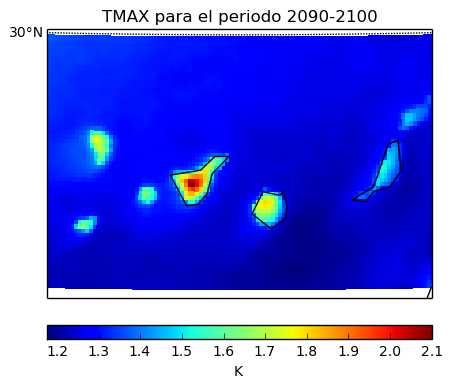

In [8]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(tmax[0]))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(tmax_units)

# Add Title
plt.title('TMAX para el periodo 2090-2100')

plt.show()

---

Para terminar mostraremos un `grid` con los cuatro períodos de temperaturas máximas.

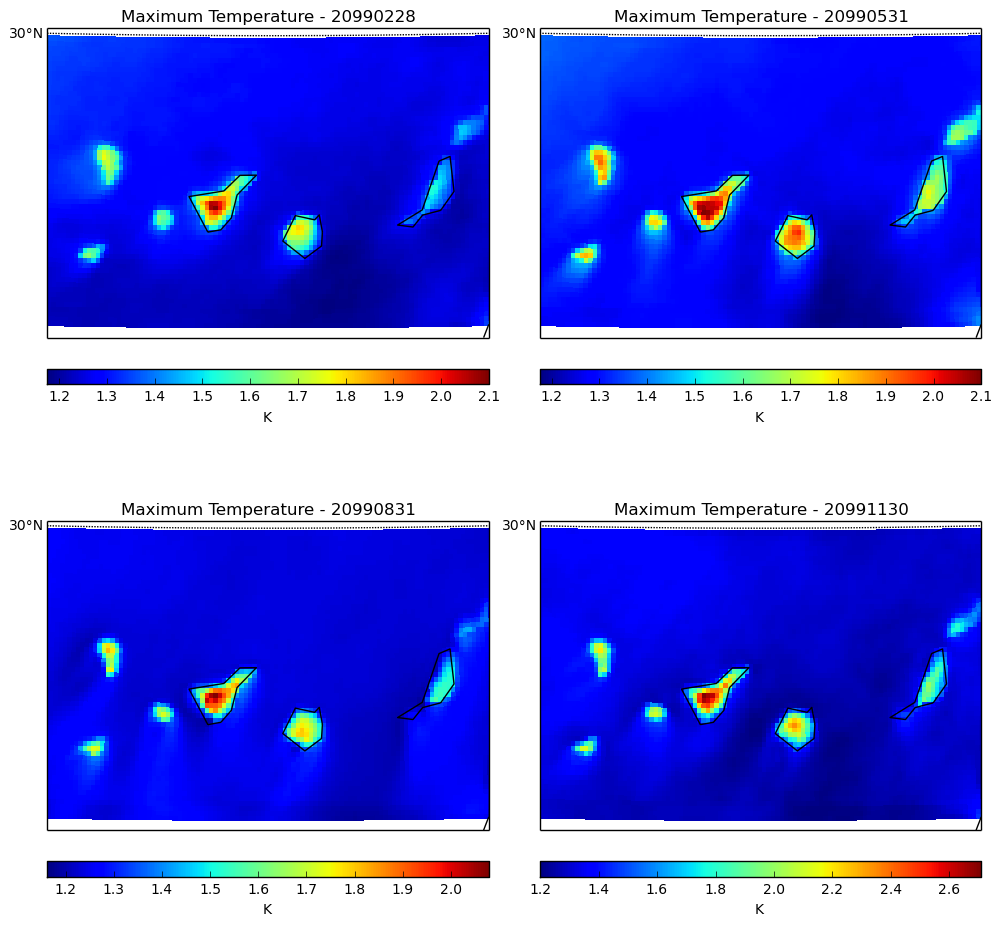

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.tight_layout()

period = 0
for t in time:
    i = int(bin(period)[2:].zfill(2)[0])
    j = int(bin(period)[2:].zfill(2)[1])
    axes[i][j].set_title("Maximum Temperature - %i" % t)
    m = Basemap(width=500000,height=350000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0, ax=axes[i][j])
    
    # Add Grid Lines
    m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

    # Add Coastlines, States, and Country Boundaries
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()

    # Add Colorbar
    cbar = m.colorbar(cs, location='bottom', pad="10%")
    cbar.set_label(tmax_units)

    # Plot Data
    cs = m.pcolor(xi,yi,np.squeeze(tmax[period]))
    period = period + 1